# Exercise 1 Implementation

Training

In [1]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the source file with the face data
mat_content = sio.loadmat('face.mat')
mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [2]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l'] # Not actually used for PCA training, needed for testing

# Append the matching data and labels into array 'faces': unnecessary for PCA training as the labels are not used (unsupervised learning)
# But we need it later for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)

# Check data and correct dimensions
print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape) # 520 data points in 2576 dimensions
print (face_label)
print (face_label.shape) # 520 data points
print(faces)
print(faces.shape)

#Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

[[152 146 147 ...  42  41  41]
 [116 125 131 ... 126 110   7]
 [110  88  89 ...  30  42  14]
 ...
 [ 93  92  88 ...  19  18  49]
 [136 118 105 ...  37  43  21]
 [ 92  82  80 ... 127 128  38]] (520, 2577)
[[152 146 147 ...  42  41  41]
 [116 125 131 ... 126 110   7]
 [110  88  89 ...  30  42  14]
 ...
 [173 158 163 ...  36  37  41]
 [ 54  52  48 ... 202 204  22]
 [ 91  91  91 ... 144 155  35]] (416, 2577)
[[ 85  85  86 ... 123 135  34]
 [106 103 103 ...  36  41   1]
 [138 141 138 ...  29  31  46]
 ...
 [ 93  92  88 ...  19  18  49]
 [136 118 105 ...  37  43  21]
 [ 92  82  80 ... 127 128  38]] (104, 2577)
[ 47  48  49 ... 205 208  12] (2577,)
[[ 47  48  49 ... 197 198 202]
 [ 57  55  52 ... 198 203 207]
 [ 54  53  53 ... 203 204 207]
 ...
 [135 115 130 ... 205 208 207]
 [122 105 207 ... 204 208 208]
 [ 96 192 246 ... 203 205 208]] (46, 56)


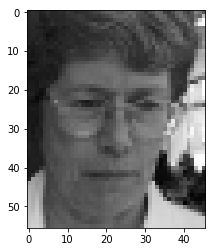

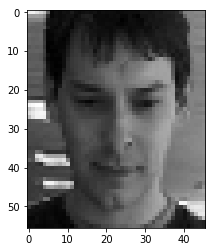

In [3]:
#Divide the data set into training and testing sets: 80% is training, 20% is testing

np.random.shuffle(faces_transposed) # Shuffle the rows (This is why we transposed)
print(faces_transposed, faces_transposed.shape)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)

image_99 = faces_transposed[99]
print(image_99, image_99.shape)
image_99 = np.reshape(image_99[:2576], (46, 56))
print (image_99, image_99.shape)
plt.imshow(image_99.T, cmap = 'gist_gray') # It is a person, so the data manipulation makes sense so far
plt.figure()
plt.imshow(np.reshape(faces_transposed[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image as a sanity check to make sure we have shuffled along the right dimension of the array

[[152 146 147 ...  41  42  41]
 [116 125 131 ... 133 126 110]
 [110  88  89 ... 184  30  42]
 ...
 [173 158 163 ...  33  36  37]
 [ 54  52  48 ... 203 202 204]
 [ 91  91  91 ... 151 144 155]] (416, 2576)
[121.58653846 121.44951923 119.25       ...  87.30048077  86.18990385
  84.59375   ] (2576,)


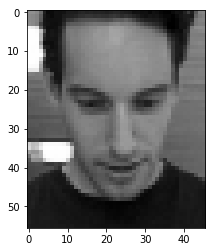

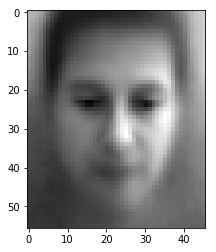

In [4]:
# Now let's start image recognition by PCA
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training face set without the labels
# Images are represented as rows of the array 'pca_train'
pca_train = training [:, :2576]
pca_test = test [:, :2576]
print (pca_train, pca_train.shape)
plt.imshow(np.reshape(pca_train[0, :], (46,56)).T, cmap = 'gist_gray') # show the first face image

# Let's compute the average face vector
avg_face = np.mean(pca_train, axis=0)
print (avg_face, avg_face.shape)
plt.figure()
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[152 146 147 ...  41  42  41]
 [116 125 131 ... 133 126 110]
 [110  88  89 ... 184  30  42]
 ...
 [173 158 163 ...  33  36  37]
 [ 54  52  48 ... 203 202 204]
 [ 91  91  91 ... 151 144 155]] (416, 2576)
[121.58653846 121.44951923 119.25       ...  87.30048077  86.18990385
  84.59375   ] (2576,)
[[ 30.41346154  24.55048077  27.75       ... -46.30048077 -44.18990385
  -43.59375   ]
 [ -5.58653846   3.55048077  11.75       ...  45.69951923  39.81009615
   25.40625   ]
 [-11.58653846 -33.44951923 -30.25       ...  96.69951923 -56.18990385
  -42.59375   ]
 ...
 [ 51.41346154  36.55048077  43.75       ... -54.30048077 -50.18990385
  -47.59375   ]
 [-67.58653846 -69.44951923 -71.25       ... 115.69951923 115.81009615
  119.40625   ]
 [-30.58653846 -30.44951923 -28.25       ...  63.69951923  57.81009615
   70.40625   ]] (416, 2576)
(2576, 416)
[[1070054.88461538 1023468.31730769  941209.         ... -236146.31730769
  -250265.33653846 -248472.875     ]
 [1023468.31730769 1127938.93990385 1070

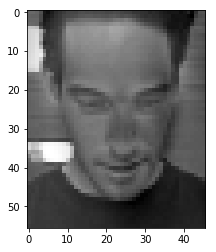

In [5]:
# Now let's subtract the mean face from all of our face images
print (pca_train, pca_train.shape)
print (avg_face, avg_face.shape)
pca_train_norm = pca_train-avg_face # works because of broadcasting
print (pca_train_norm, pca_train_norm.shape)
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and compare it to the previously printed image: not the same

pca_train_norm_transposed = pca_train_norm.T
print (pca_train_norm_transposed.shape)
# Computing the covariance matrix
cov = np.dot(pca_train_norm_transposed, pca_train_norm)
print (cov, cov.shape)
cov = cov/416
print (cov, cov.shape)

In [ ]:
# Computing the eigenvalues and eigenvectors of the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them and the corresponding eigenvalues
print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]
print (eig_test_1, eig_test_1.shape)
print (eig_test_2, eig_test_2.shape)
print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # Checking them: they are basically zero, so the eigenvalue computation is good


In [ ]:
# take absolute value of the eigenvalues (complex eigenvalues are the result of calculation rounding errors)
eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

# order them
print (eigvals.argsort(), eigvals.argsort().shape)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
print (index, index.shape)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]

x = np.arange(0, 2576)
print (x, x.shape)
print (eigvals, eigvals.shape)

# plot them
plt.subplot(3, 1, 1)
plt.plot(x, eigvals) # clearly out of scale, so let's just take the first 200 of them
plt.title('All eigenvalues of the covariance matrix')

plt.subplot(3, 1, 2)
plt.plot(x[:200], eigvals[:200]) # still out of scale, so let's just take the first 20 of them
plt.title('First 200 eigenvalues of the covariance matrix')

plt.subplot(3, 1, 3)
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.show()

In [ ]:
# We just keep the first n eigenvectors and eigenvalues

n = 500
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]
print (eigvecs_best, eigvecs_best.shape)
print (eigvals_best, eigvals_best.shape)

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

In [ ]:
# Let's try to reconstruct one face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

Training

In [ ]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

In [ ]:
# Let's classify the first image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

distances = np.zeros(416)

for i in range(416):
    distances[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
    
print (distances, distances.shape)

smallest_distance = distances.min()
smallest_index = distances.argmin()
print (smallest_distance, smallest_index)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.imshow(np.reshape(pca_train[smallest_index, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

In [ ]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.
# Next step is to find the minimum of each column, and the corresponding row index (per column)
print (distances, distances.shape)

smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0)
print (smallest_distance, smallest_distance.shape)
print (smallest_index, smallest_index.shape)

# Get the smallest distance image's label
#detected_label = np.zeros (104)
#for j in range(104):
#    detected_label[j] = training[smallest_index[j], 2576]
#print (detected_label, detected_label.shape)

actual_label = test [:, 2576].T

print (actual_label, actual_label.shape)


# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

same = (training[smallest_index, 2576]==actual_label)

print (same, same.shape)

percentage = np.sum(same)/104

print (percentage)


In [ ]:
# Let's try to reconstruct one testing face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check_test = avg_face + np.dot(abs(eigvecs_best), proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')